# Time Series Analysis

In this exercise we'll attempt to predict Bitcoin prices with Python.

How to approach time series data manipulation and how you can use it in your everyday work. 

The BTC price movements from January to March of 2015 will be used, a time in which bitcoin largely went sideways. The price data will be pulled from Coinbase.


In [17]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
# Data from Kaggle.
df = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv', index_col=0)

/usr/local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [21]:
df.index = [datetime.utcfromtimestamp(x) for x in df.index]

## See the last 10 rows of the data.

In [34]:
# Weighted_Price is the Volume Weighted Average Price.
df.tail(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2020-12-30 23:51:00,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450
2020-12-30 23:52:00,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539
2020-12-30 23:53:00,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945
2020-12-30 23:54:00,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950
2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


## Let's visualize each of the columns.

In [ ]:
# Plot the Open, High, Low, Close on a chart, and Volume in another chart.

Notice how long it takes to do that... Do you need to see every single minute plotted on the graph?

## How many data samples do we have?

In [27]:
df.shape

(4727777, 7)

In [ ]:
# Resample to daily bars and plot again.

## What is the format of the dates in the data? From what date to what date and at what granularity?

## How many NaNs do we have? Are they at specific hours? Why are they NaNs?

## Let's see what happened in 2017...

In [32]:
# Print the first 20 rows
df['2017'].head(20)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400,966.340000
2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7814.876061,966.305479
2017-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010,966.430000
2017-01-01 00:06:00,966.58,966.58,966.58,966.58,0.331732,320.645952,966.580000
2017-01-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We need to fill in the missing data, or can we get rid of it?

In [ ]:
## This is an art as much as it is a science....

In [ ]:
## S

<AxesSubplot:>

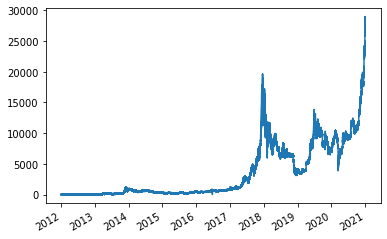

In [24]:
df['Close'].plot()

In [28]:
df.tail(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2020-12-30 23:51:00,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450
2020-12-30 23:52:00,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539
2020-12-30 23:53:00,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945
2020-12-30 23:54:00,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950
2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


,level_0,index,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1657697,1425168060,253.32,253.32,253.32,253.32,1.640000,415.444800,253.320000
1,1,1657698,1425168120,253.28,253.28,253.28,253.28,3.300000,835.824000,253.280000
2,2,1657699,1425168180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1657700,1425168240,253.16,253.16,253.16,253.16,5.000000,1265.800000,253.160000
4,4,1657701,1425168300,253.16,253.29,253.16,253.29,1.200000,303.920648,253.267207
5,5,1657702,1425168360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1657703,1425168420,253.33,253.33,253.33,253.33,3.320000,841.055600,253.330000
7,7,1657704,1425168480,253.14,253.14,253.14,253.14,0.220800,55.893312,253.140000
8,8,1657705,1425168540,253.17,253.17,252.84,252.84,2.083148,526.867097,252.918751
9,9,1657706,1425168600,253.37,253.37,253.37,253.37,2.810000,711.969700,253.370000


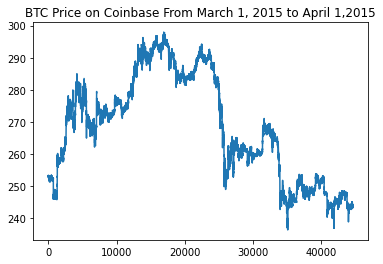

In [7]:
df = df[ (df['Timestamp'] > 1425168000) & 
         (df['Timestamp'] <= 1427846400) ].reset_index()  # timestamps for 3/1/15 to 4/1/15
display(df.head(10))

df['Open'].plot(title="BTC Price on Coinbase From March 1, 2015 to April 1,2015");

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, explained_variance_score, recall_score, precision_score, confusion_matrix